In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

In [79]:
train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')

In [85]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [87]:
X_train = train.drop(['Activity', 'ActivityName'], axis=1)
y_train = train['Activity']

In [91]:
train.shape, X_train.shape, y_train.shape

((7352, 564), (7352, 562), (7352,))

In [93]:
test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [95]:
X_test = test.drop(['Activity', 'ActivityName'], axis=1)
y_test = test['Activity']

In [97]:
test.shape, X_test.shape, y_test.shape

((2947, 564), (2947, 562), (2947,))

## Data Cleaning

### 1. Check for Duplicates

In [100]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [105]:
print('We have {} Null values in train'.format(train.isnull().values.sum()))
print('We have {} Null values in test'.format(test.isnull().values.sum()))

We have 0 Null values in train
We have 0 Null values in test


## 3. Check for data imbalance

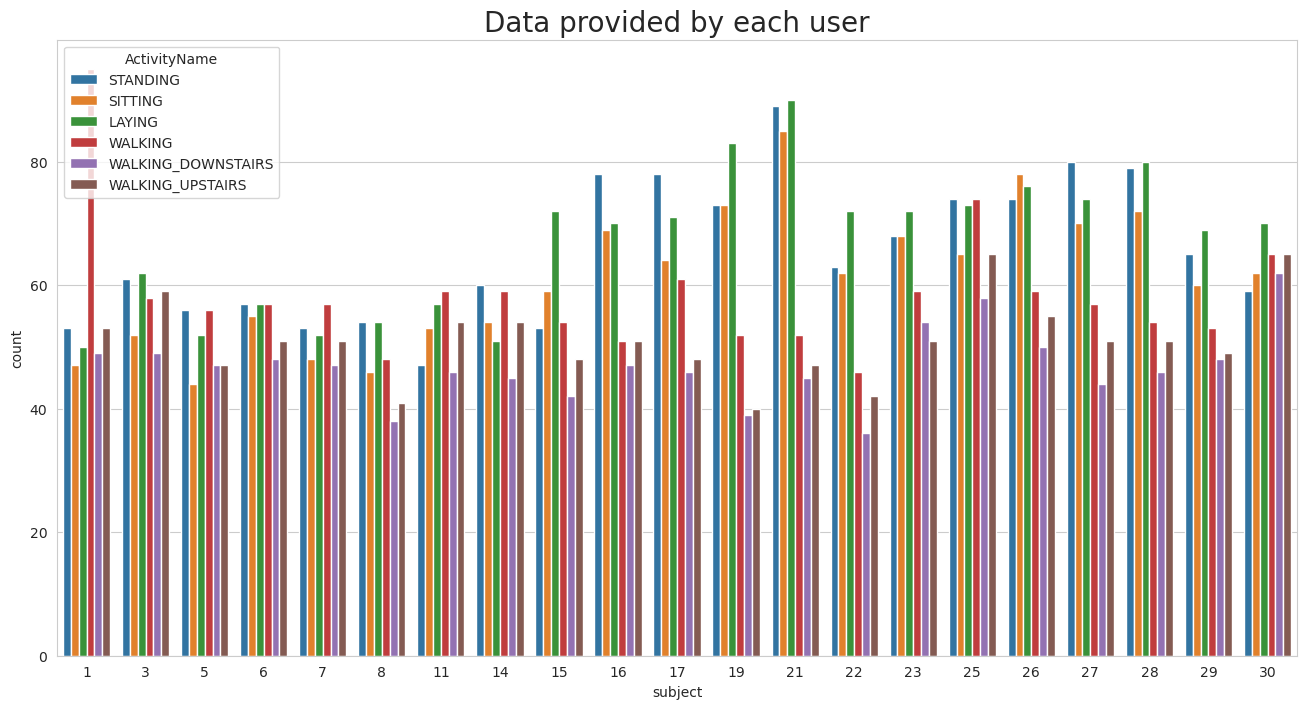

In [110]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


1. The data appears to be well-balanced across all subjects

2.  Slight Variations
    - There are minor variations in the number of data points for different activities per subject, but nothing that would suggest a significant imbalance.
    - For instance, subjects 1 and 19 seem to have higher counts for the "WALKING" activity compared to other subjects, while subjects like 7 and 15 have relatively fewer samples for some activities.
  

3. Good Data Quality for Classification:

    - Given the balanced distribution, the model will not likely suffer from biases due to class imbalance. This is ideal for training a robust classifier.

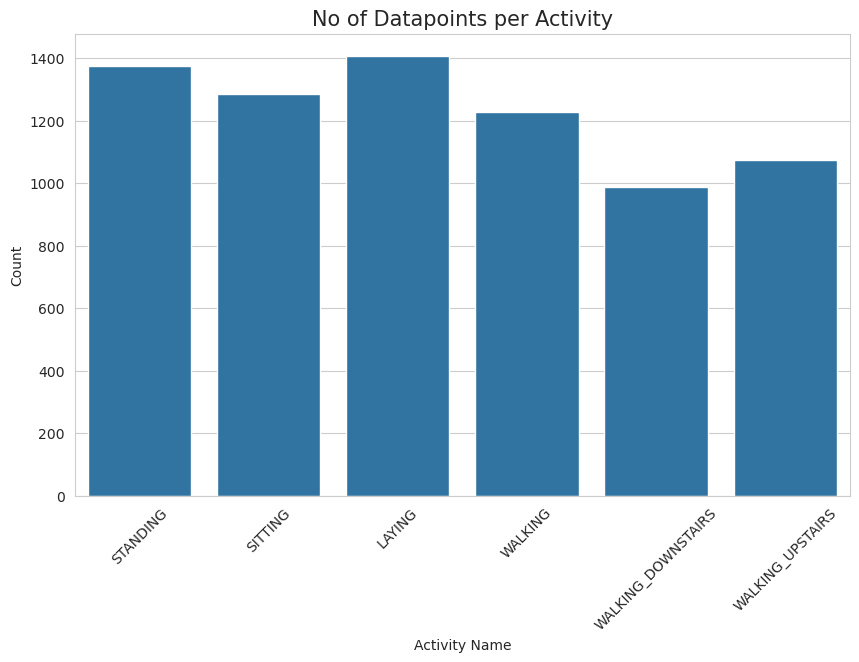

In [143]:
plt.figure(figsize=(10, 6))
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(x='ActivityName', data=train)  
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Activity Name')
plt.show()


1. Although there is a slight variation in the number of samples per activity, the differences are not large enough to be considered problematic. The dataset is fairly well-balanced, which is good for training a robust model.
2. The dataset contains a good variety of different activities, ensuring that the model will learn to differentiate between stationary activities (like SITTING or STANDING) and dynamic activities (like WALKING or WALKING_UPSTAIRS).

## EDA



+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




In [ ]:
train['tBodyAccMagmean']

### 2. Stationary and Moving activities are completely different

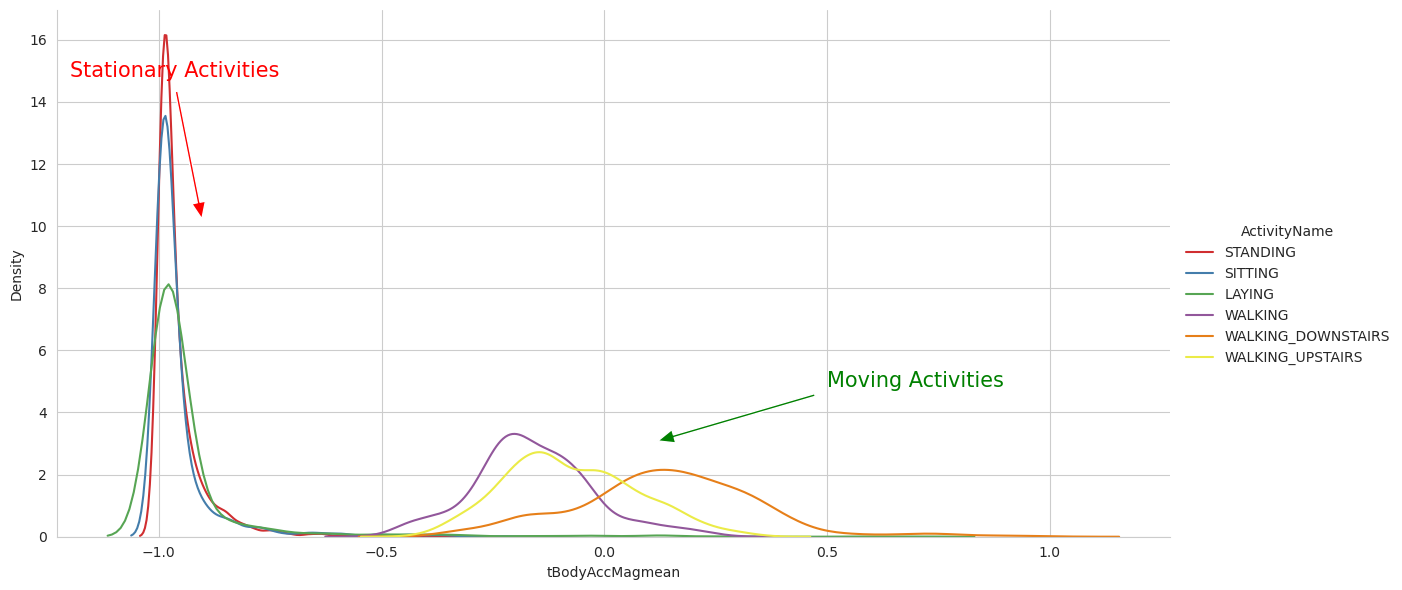

In [174]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=6, aspect=2)
facetgrid.map(sns.kdeplot, 'tBodyAccMagmean').add_legend()

# Adjust coordinates and use a simple arrow style for "Stationary Activities"
plt.annotate("Stationary Activities", xy=(-0.9, 10), xytext=(-1.2, 15), 
             size=15, va='center', ha='left', color='red',
             arrowprops=dict(facecolor='red', shrink=0.05, headwidth=10, width=2))

# Adjust coordinates for "Moving Activities"
plt.annotate("Moving Activities", xy=(0.1, 3), xytext=(0.5, 5), 
             size=15, va='center', ha='left', color='green',
             arrowprops=dict(facecolor='green', shrink=0.05, headwidth=10, width=2))

plt.show()


1. Stationary Activities:
- Stationary activities like STANDING, SITTING, and LAYING are grouped tightly near a tBodyAccMagmean value of -1.0.
- These activities have very sharp and narrow distributions, indicating a very small range of body acceleration, which makes sense because these are activities where the body remains largely still.

2. Moving Activities:
- Moving activities such as WALKING, WALKING_UPSTAIRS, and WALKING_DOWNSTAIRS are spread across a wider range of tBodyAccMagmean values, from about -0.5 to 1.0.
- This shows that there is much more variability in body acceleration during movement, with the distributions being wider and flatter compared to the stationary activities.

Stationary activities have high-density peaks with lower variability, while moving activities are more spread out, suggesting a greater degree of motion.

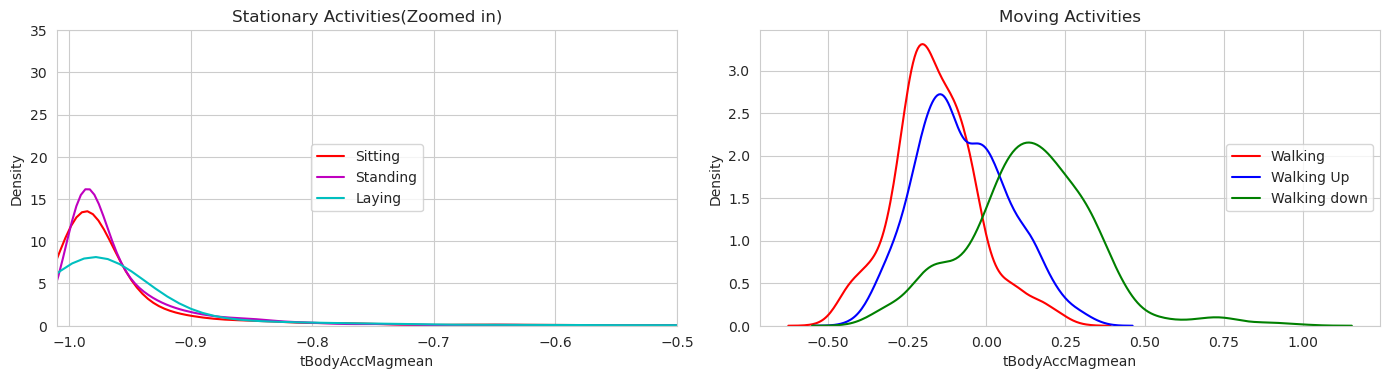

In [182]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.kdeplot(df4['tBodyAccMagmean'],color = 'r', label = 'Sitting')
sns.kdeplot(df5['tBodyAccMagmean'],color = 'm',label = 'Standing')
sns.kdeplot(df6['tBodyAccMagmean'],color = 'c', label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.kdeplot(df1['tBodyAccMagmean'],color = 'red', label = 'Walking')
sns.kdeplot(df2['tBodyAccMagmean'],color = 'blue',label = 'Walking Up')
sns.kdeplot(df3['tBodyAccMagmean'],color = 'green', label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

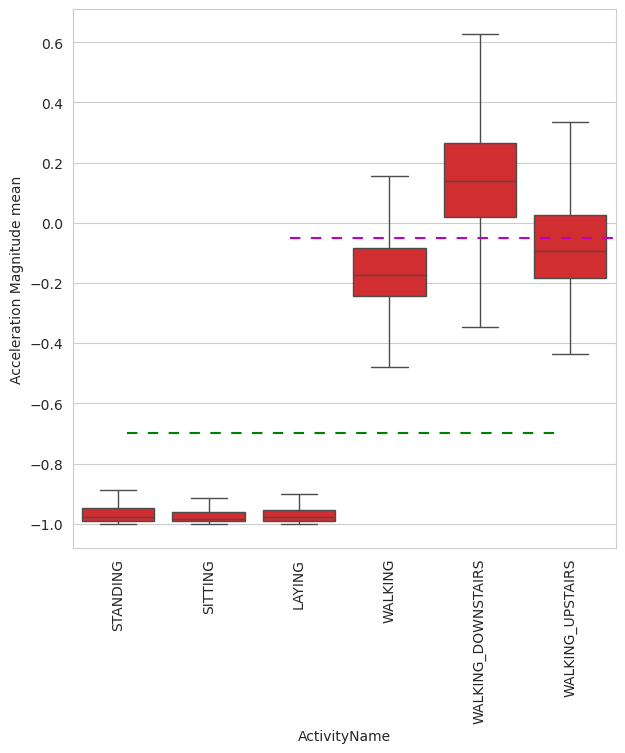

In [185]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

Insights from the Boxplot:
1. Stationary Activities (STANDING, SITTING, LAYING):

    - The stationary activities have consistent and low body acceleration, with median values clustered around -1.0.
    - The range (interquartile range) for these activities is small, indicating very little variation in body acceleration during stationary states.
 
2. Moving Activities (WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS):

    - Walking has a median acceleration of around -0.25, with a moderate interquartile range. This suggests steady, moderate movements with some variability in body acceleration.
    - Walking Upstairs shows greater variability compared to walking, with a higher median and a wider range, reflecting the dynamic nature of moving upstairs.
    - Walking Downstairs has a similar pattern but with slightly higher variability than walking, indicating the complex body movements involved in moving downstairs.
  
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.

### 4. Position of GravityAccelerationComponants also matters 

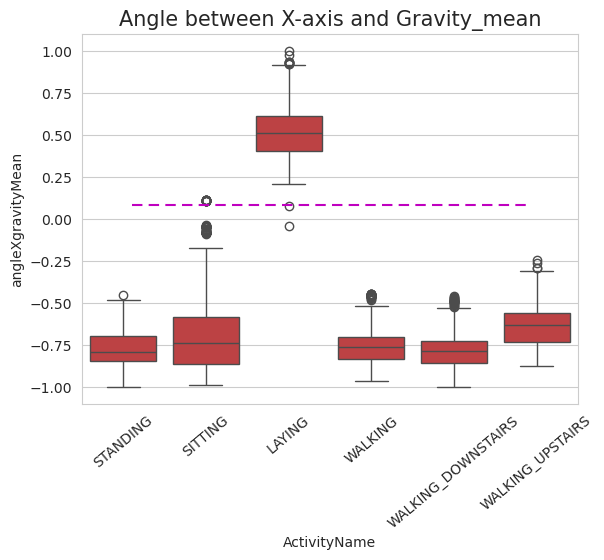

In [193]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

- This boxplot shows the angle between the X-axis and gravity for different activities (Standing, Sitting, Laying, Walking, Walking Downstairs, Walking Upstairs).

- Observations:

  - Laying shows the highest angle (around 0.75 on average), which is expected as the body is horizontal in this activity, making the angle between the gravity vector and the X-axis quite large.
  - Standing and Sitting have lower angles with a tighter spread, indicating that during these activities, the body remains relatively aligned with gravity.
  - For moving activities (Walking, Walking Downstairs, Walking Upstairs), the angle is more dispersed but remains centered around negative values. This could indicate that during movement, the body orientation with respect to gravity varies more frequently, leading to a wider distribution of angles.
  - The axhline shows a threshold for the angle around 0.1, which helps differentiate between the laying activity and the rest.

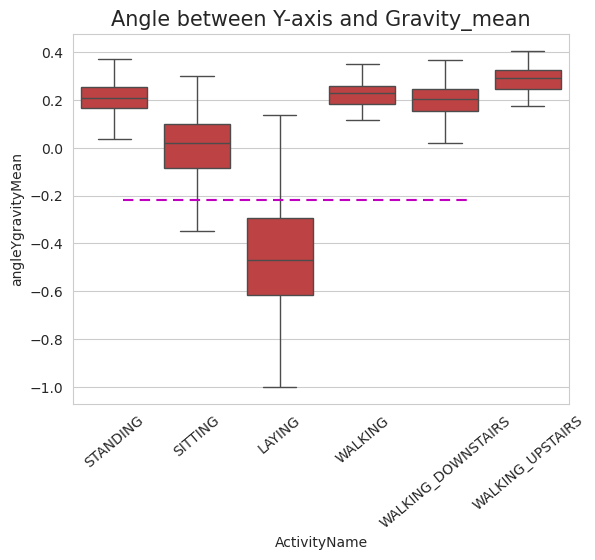

In [196]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

- This plot is similar to the second one but compares the Y-axis orientation with gravity.

- Observations:

  - Laying shows a significantly lower angle, with the box concentrated around -0.5. This reflects that the body lies more horizontally relative to gravity during this activity.
  - Standing and Sitting show tight distributions around positive values, indicating that the body is vertically aligned, maintaining a small angle with the Y-axis.
  - Moving activities (Walking, Walking Downstairs, Walking Upstairs) have more varied angles, but they tend to center around 0.2 to 0.3. The variation suggests that as the body moves, there is more angular displacement relative to gravity.

# Apply t-sne on the data 

In [199]:
from sklearn.manifold import TSNE

In [209]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
    for index, perplexity in enumerate(perplexities):
        # perform t-SNE
        print('\nPerforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')

        # prepare the data for seaborn
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1], 'label':y_data})

        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,  # Replaced `size` with `height`
                   palette="Set1", markers=['^', 'v', 's', 'o', '1', '2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('Saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



Performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.018s...
[t-SNE] Computed neighbors for 7352 samples in 0.289s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597464
[t-SNE] Computed conditional probabilities in 0.018s
[t-SNE] Iteration 50: error = 119.3583679, gradient norm = 0.0423915 (50 iterations in 0.668s)
[t-SNE] Iteration 100: error = 105.0393753, gradient norm = 0.0220014 (50 iterations in 

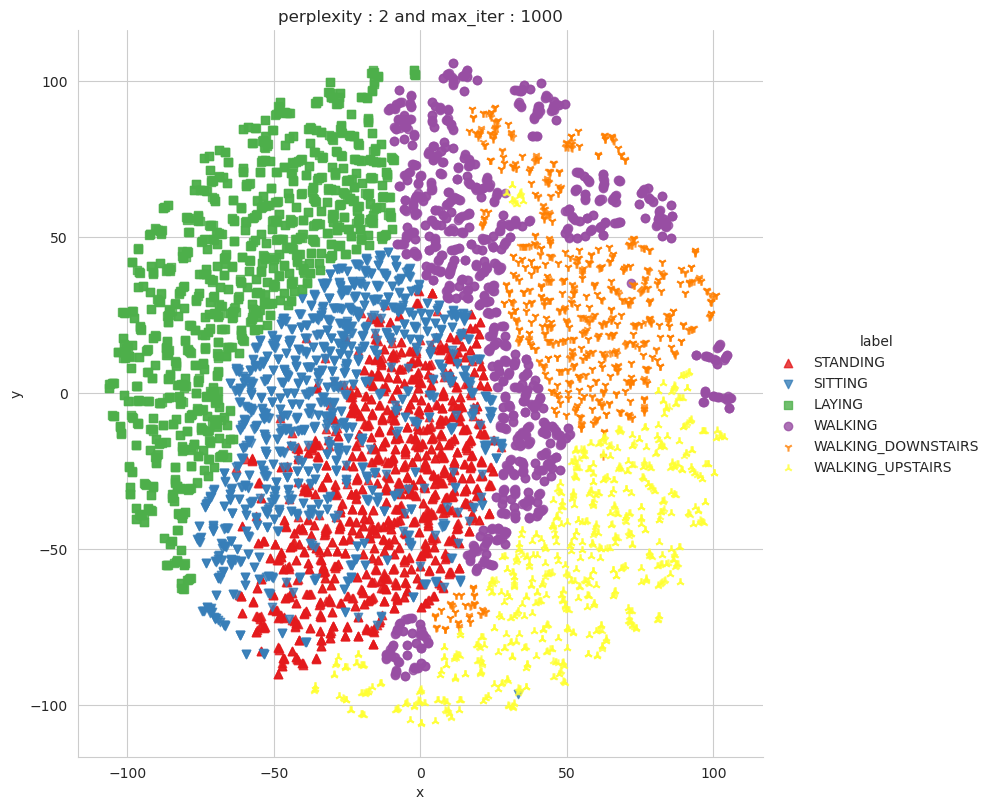

Done

Performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 0.296s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.025s
[t-SNE] Iteration 50: error = 107.1593857, gradient norm = 0.0410747 (50 iterations in 0.757s)
[t-SNE] Iteration 100: error = 95.6822510, gradient norm = 0.0135004 (50 iteration

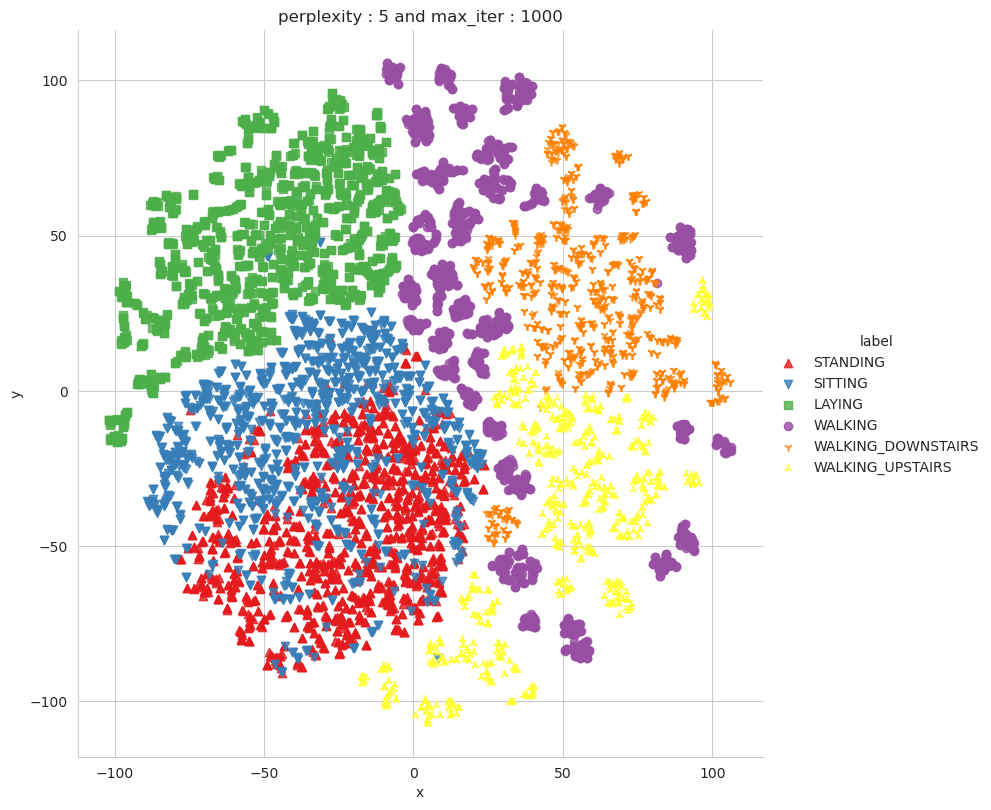

Done

Performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.015s...
[t-SNE] Computed neighbors for 7352 samples in 0.314s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.047s
[t-SNE] Iteration 50: error = 97.8918076, gradient norm = 0.0356325 (50 iterations in 0.801s)
[t-SNE] Iteration 100: error = 88.9415359, gradient norm = 0.0099080 (50 iteration

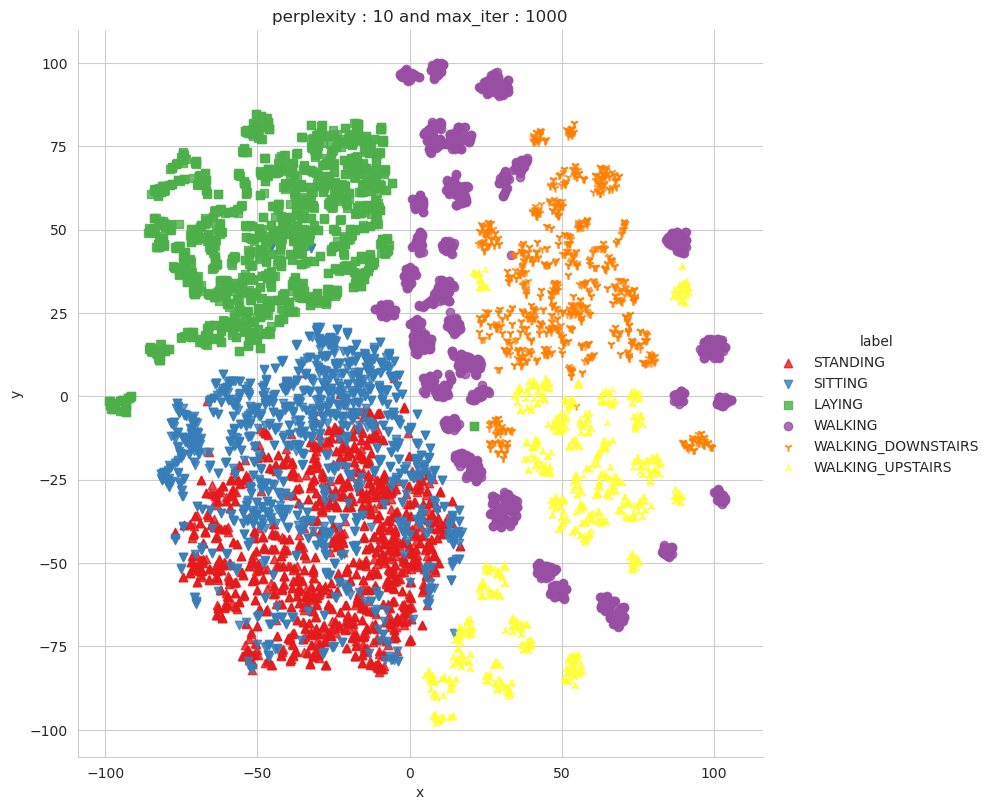

Done

Performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.011s...
[t-SNE] Computed neighbors for 7352 samples in 0.350s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.130s
[t-SNE] Iteration 50: error = 89.2978821, gradient norm = 0.0299984 (50 iterations in 0.914s)
[t-SNE] Iteration 100: error = 82.9680328, gradient norm = 0.0079409 (50 iteration

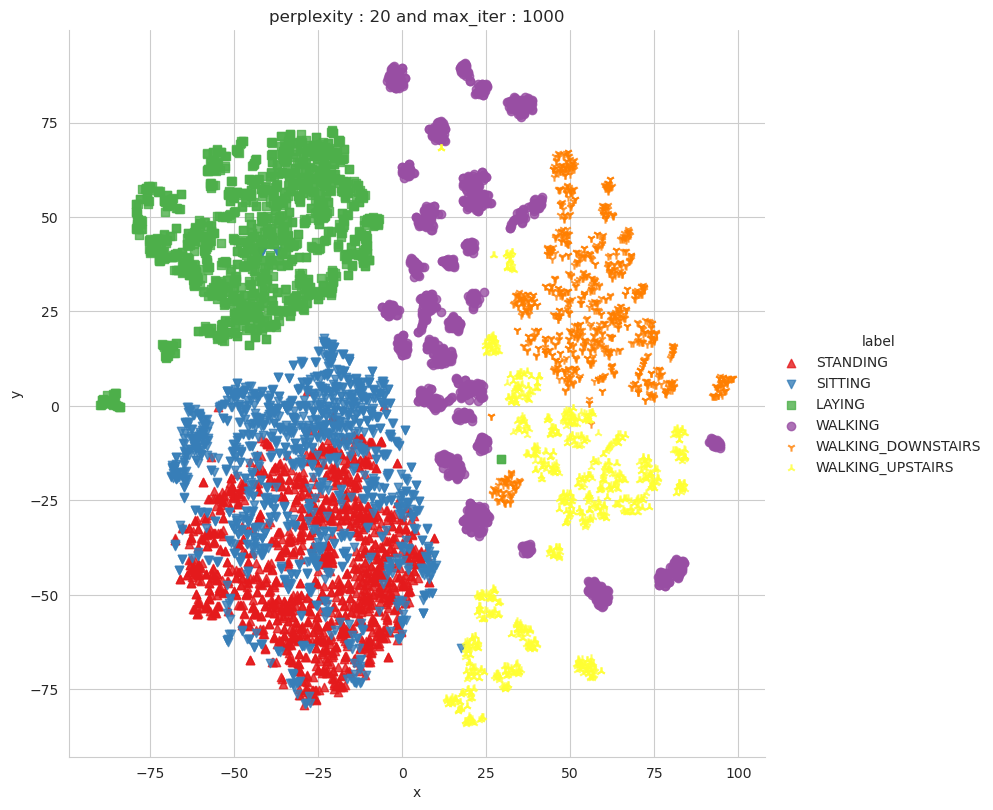

Done

Performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.014s...
[t-SNE] Computed neighbors for 7352 samples in 0.418s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.252s
[t-SNE] Iteration 50: error = 78.8830719, gradient norm = 0.0254167 (50 iterations in 1.301s)
[t-SNE] Iteration 100: error = 75.2915115, gradient norm = 0.0055848 (50 iteratio

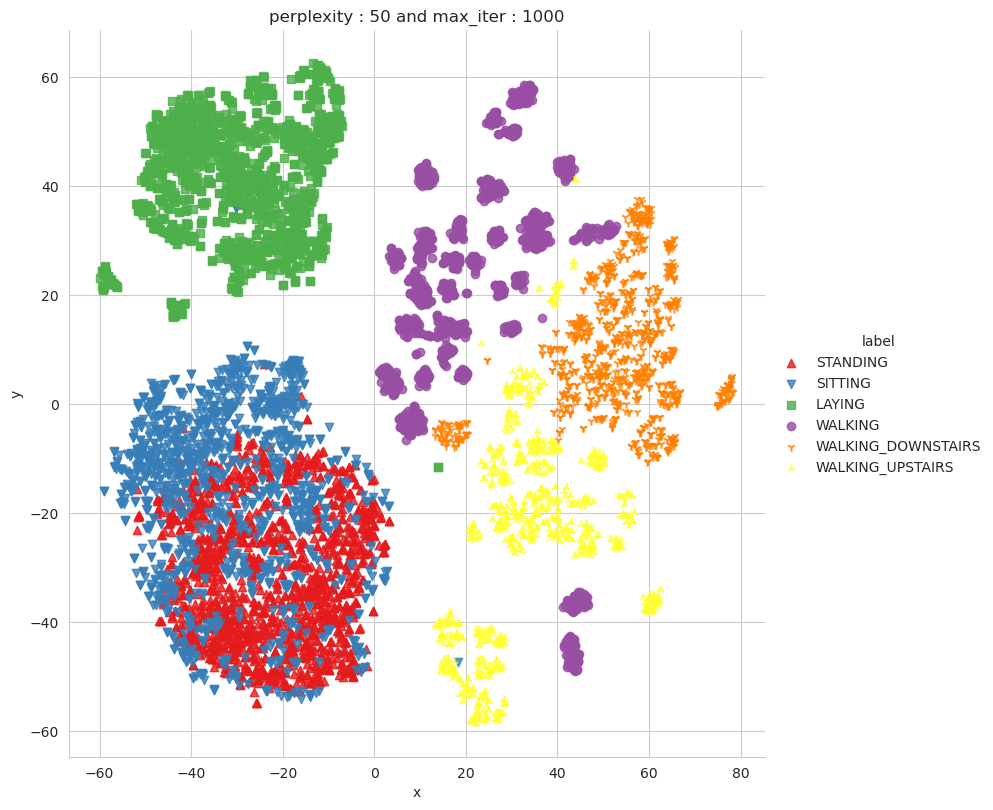

Done


In [213]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

#### 1. Perplexity = 2:
- Clusters: The data points are spread out, but there is noticeable clustering for different activities. However, the boundaries between clusters are not very distinct, especially for stationary activities like Standing, Sitting, and Laying. These are overlapping, meaning that these activities are harder to separate with lower perplexity.
- Walking Activities: Walking, Walking Upstairs, and Walking Downstairs show clearer separation, but there are still overlapping areas between dynamic movements.
#### 2. Perplexity = 50:
- Distinct Clusters: At a higher perplexity value, the clusters are more distinct. Walking, Walking Downstairs, and Walking Upstairs are now very clearly separated. This higher perplexity value better captures the global structure of the data, leading to clearer distinctions between movement-based activities.
- Stationary Activities: Standing, Sitting, and Laying are now grouped more distinctly. There’s still some overlap between Standing and Sitting, but Laying is more separate.
- Overall Separation: At this higher perplexity, the overall separation between activities is much clearer, suggesting that the higher perplexity values are better at capturing the differences between static and dynamic activities.
- Conclusion:
  - Lower perplexity (e.g., 2) gives a more local view of the data and tends to mix activities together, especially the stationary ones.
  - Higher perplexity (e.g., 50) provides a more global picture of the data and clearly separates different activities, especially for dynamic ones like walking.